To predict whether a Customer will make a purchase, based on the Age and Salary

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
customer_data = pd.read_csv('../Social_Network_Ads.csv')

In [3]:
customer_data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
# split data into feature matrix (X) and target vector (y)
X = customer_data.iloc[:, :-1].values
y = customer_data.iloc[:, -1].values

In [5]:
# split into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# create a scaler
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)

In [7]:
# perform logistic regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [11]:
classifier.predict(sc_X.transform(X_test))

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [57]:
y_pred = classifier.predict(sc_X.transform(X_test))

In [17]:
classifier.predict(sc_X.transform(X_test)).shape

(80,)

In [21]:
y_test

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1], dtype=int64)

In [26]:
# putting the real result and the predicted result together
prediction_comparsion = np.concatenate((y_test.reshape(-1,1), classifier.predict(sc_X.transform(X_test)).reshape(-1,1)), axis=-1)

In [34]:
tab = pd.DataFrame(prediction_comparsion, columns=['Actual', "Predicted"])
tab.head()

,Actual,Predicted
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0


In [31]:
# replace with number label with Words
tab.replace(to_replace=[0, 1], value=["Not Purchased", "Purchased"])


,Actual,Predicted
0,Not Purchased,Not Purchased
1,Purchased,Purchased
2,Not Purchased,Not Purchased
3,Purchased,Purchased
4,Not Purchased,Not Purchased
...,...,...
75,Not Purchased,Not Purchased
76,Purchased,Purchased
77,Purchased,Purchased
78,Not Purchased,Not Purchased


In [65]:
s = classifier.predict(sc_X.transform([[30, 87000]]))
if s == [0]:
                       print("Not Purchased")
else:
                       print("Purchased")

Not Purchased


In [66]:
# get confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
sc = confusion_matrix(y_test, y_pred)


In [67]:
accuracy_score(y_test, y_pred)

0.8625

In [68]:
sc

array([[50,  2],
       [ 9, 19]], dtype=int64)

<Figure size 2000x1000 with 0 Axes>

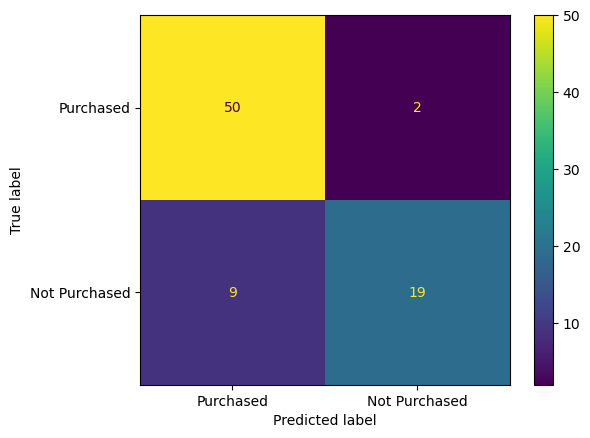

In [69]:
# Display confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
plt.figure(figsize=(20,10))
ConfusionMatrixDisplay(sc, display_labels=["Purchased", "Not Purchased"]).plot()
plt.show()
